In [10]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import *
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import warnings


def load_dataset(data_set):

    mat = {k: v for k, v in data_set.items() if k[0] != '_'}

    data = pd.DataFrame({k: pd.Series(v[:, 0]) for k, v in mat.items()})


    # Prepare the data

    data1 = data[["DayCode1", "Occupation1", "Power1"]]

    data2 = data[["DayCode2", "Occupation2", "Power2"]]

    data1 = data1.rename(

        columns={"DayCode1": "DayCode", "Occupation1": "Occupation", "Power1": "Power"})

    data2 = data2.rename(

        columns={"DayCode2": "DayCode", "Occupation2": "Occupation", "Power2": "Power"})

    data = pd.concat([data2, data1])

    data = data.dropna(axis=0)
    return data



load_dataset(loadmat("LCAlgarve.mat"))

,DayCode,Occupation,Power
0,0.8,5.0,0.747135
1,0.8,5.0,1.370311
2,0.8,5.0,0.759630
3,0.8,5.0,1.125687
4,0.8,5.0,1.910926
...,...,...,...
1249,0.8,3.0,2.131813
1250,0.8,3.0,0.410176
1251,0.8,3.0,0.293854
1252,0.8,3.0,0.378586


### Normality test of the dataset


Normality Tests ( Checking Normal Distributions )

In statistics, normality tests are used to determine if a data set is well-modeled by a normal distribution and to compute how likely it is for a random variable underlying the data set to be normally distributed.
Tests whether a data sample has a Gaussian (Normal) distribution.

Main obejctive of performing Normality Tests is to validate the Gaussian distribution of data. 
Given the dataset size, D'Agostino's K² Test and Anderson-Darling Test would be appropriate choices.

<class 'pandas.core.frame.DataFrame'>
Index: 3005 entries, 0 to 1253
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DayCode     3005 non-null   float64
 1   Occupation  3005 non-null   float64
 2   Power       3005 non-null   float64
dtypes: float64(3)
memory usage: 93.9 KB
None
   DayCode  Occupation     Power
0      0.8         5.0  0.747135
1      0.8         5.0  1.370311
2      0.8         5.0  0.759630
3      0.8         5.0  1.125687
4      0.8         5.0  1.910926
         Occupation mean  Occupation std
DayCode                                 
0.05            3.000000        0.817918
0.15            4.000000        1.002614
0.25            3.200000        0.400417
0.30            3.600000        1.201252
0.35            3.740933        1.303435
0.50            2.663158        0.473462
0.70            3.000000        0.000000
0.80            2.830189        0.734096
1.00            3.200000        0.400417

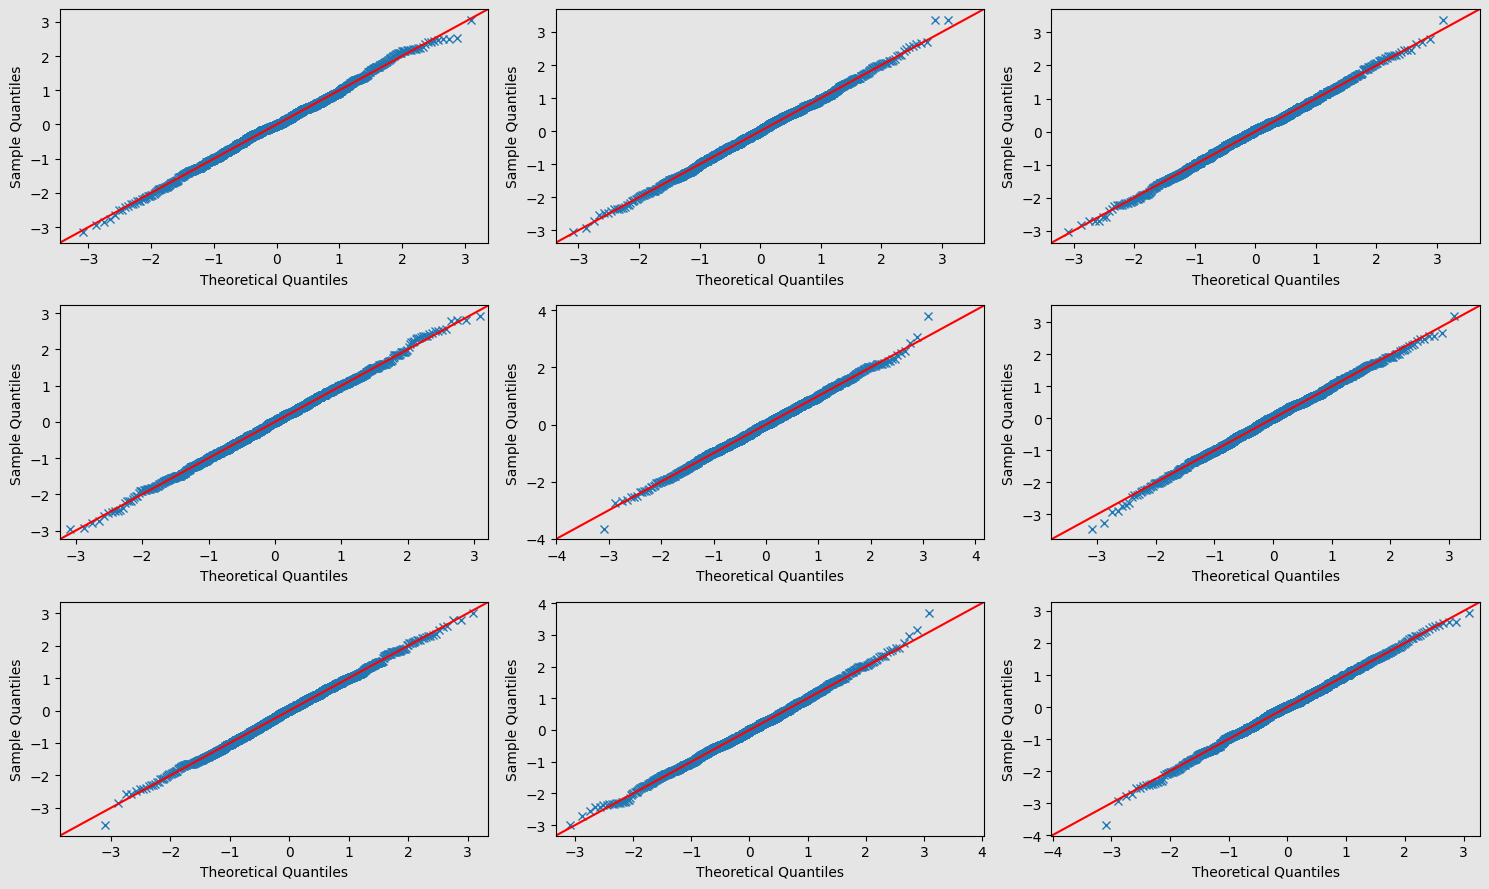

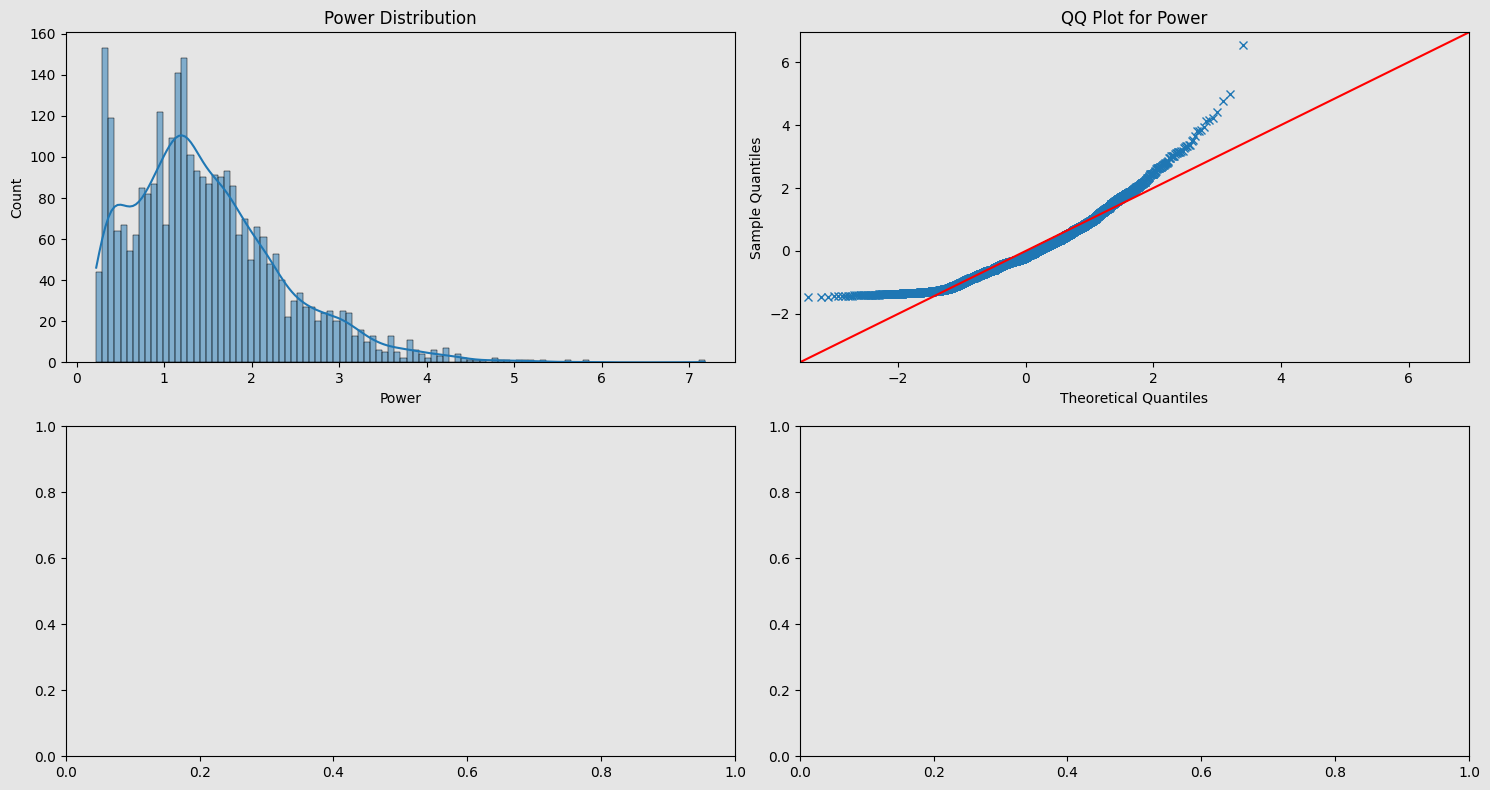


Normality test for the 'Power' column: 


H0: Power is normally distributed
H1: Power is not normally distributed

Skewness for Power is 1.046 and kurtosis is 1.701

Performing Shapiro–Wilk test
Shapiro Test Statistic 	 0.93622
p-value 	 4.295927216204073e-34

Performing D'Agostino's K2 test
D'Agostino's K2 Test Statistic 	 500.32654
p-value 	 2.2671072101201093e-109

Performing Anderson-Darling test
Anderson-Darling Test Statistic 	 37.10178617295105
At 15.0% significance level, critical value is 0.575
At 10.0% significance level, critical value is 0.655
At 5.0% significance level, critical value is 0.786
At 2.5% significance level, critical value is 0.917
At 1.0% significance level, critical value is 1.091

We can reject the null hypothesis (D'Agostino's K²), so our series is not normally distributed.
We can reject the null hypothesis (Anderson-Darling), so our series is not normally distributed.

Overall normality result for 'Power': Not Normal
Kurtosis of normal distribution: 1.69

<Figure size 1500x700 with 0 Axes>

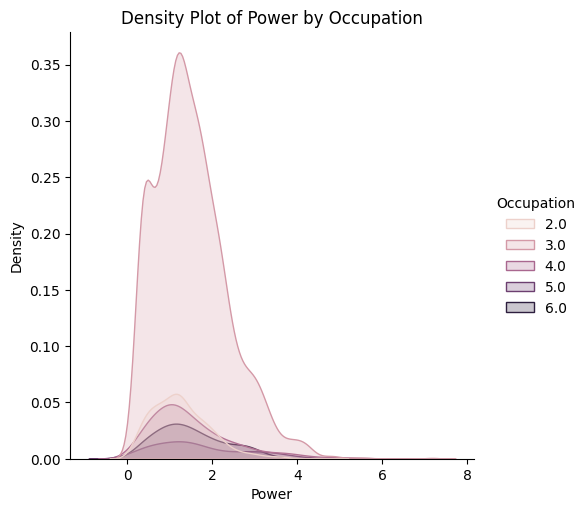

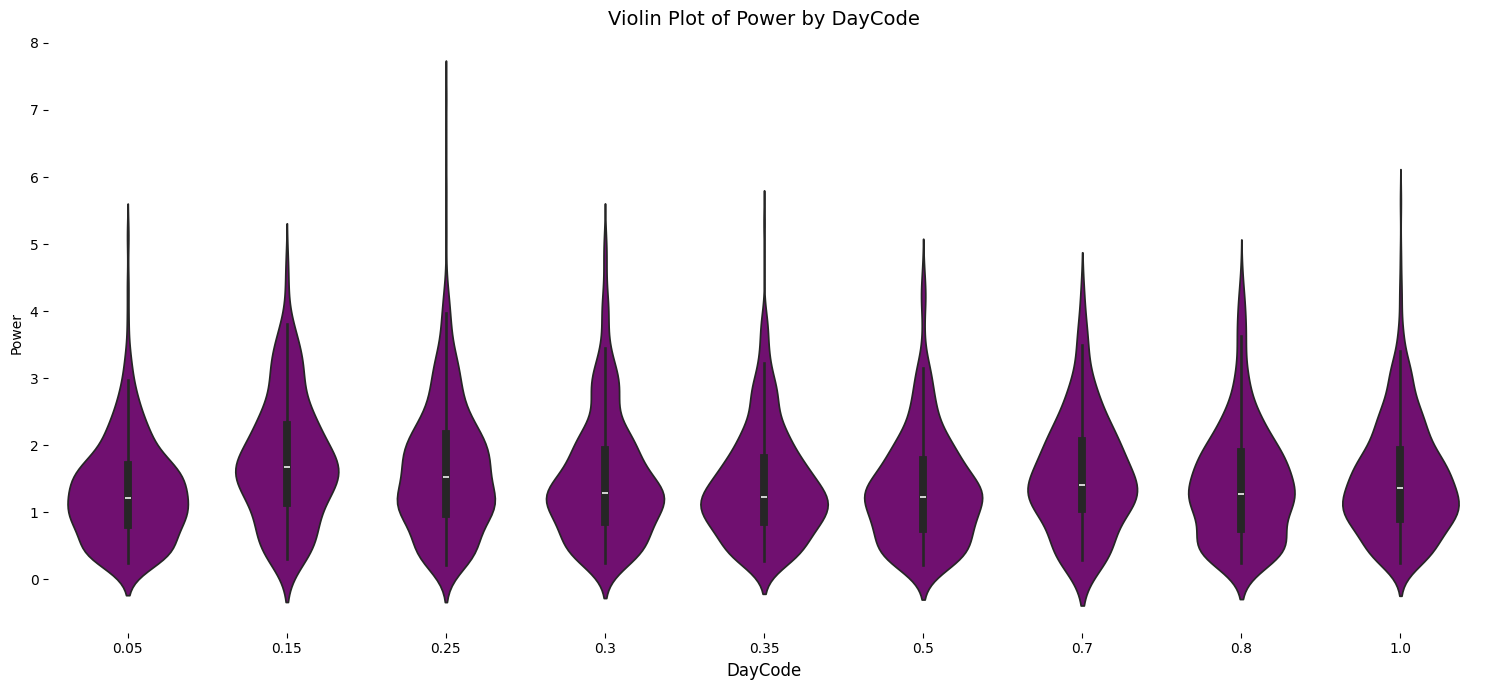

In [11]:


df = load_dataset(loadmat("LCAlgarve.mat"))

# Display basic information about the dataset
print(df.info())
print(df.head())

# Summary Statistics by DayCode
daycode_stats = df.groupby('DayCode').agg({'Occupation': ['mean', 'std']})
daycode_stats.columns = [' '.join(col).strip()
                         for col in daycode_stats.columns.values]
print(daycode_stats)

# Normality Tests Visualization
fig = plt.figure(1, figsize=(15, 9), facecolor="#E5E5E5")

for i in range(1, 10):
    normal_series = np.random.normal(0, 1, 1000)
    ax = fig.add_subplot(3, 3, i)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        sm.qqplot(normal_series, ax=ax, marker="x", line="45", fit=True)
    ax.set_facecolor("#e5e5e5")

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(15, 8), facecolor="#e5e5e5")
axes = axes.ravel()

for ax in axes:
    ax.set_facecolor("#e5e5e5")

sns.histplot(data=df, x="Power", ax=axes[0], bins=100, kde=True).set_title(
    "Power Distribution")

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sm.qqplot(df["Power"], ax=axes[1], marker="x", line="45", fit=True)

axes[1].set_title("QQ Plot for Power")

plt.tight_layout()
plt.show()

# Normality Check Function


def check_normality(series, alpha=0.05):
    print(f"\nH0: {series.name} is normally distributed")
    print(f"H1: {series.name} is not normally distributed\n")
    print(f"Skewness for {series.name} is {series.skew().round(3)} "
          f"and kurtosis is {series.kurtosis().round(3)}\n")

    # Shapiro-Wilk Test
    if len(series) <= 5000:
        print("Performing Shapiro–Wilk test")
        statistic_sw, pvalue_sw = st.shapiro(series)
        print(f"Shapiro Test Statistic \t {round(statistic_sw, 5)}")
        print(f"p-value \t {pvalue_sw}\n")

    # D'Agostino's K² Test
    print("Performing D'Agostino's K2 test")
    statistic_dk, pvalue_dk = st.normaltest(series)
    print(f"D'Agostino's K2 Test Statistic \t {round(statistic_dk, 5)}")
    print(f"p-value \t {pvalue_dk}\n")

    # Anderson-Darling Test
    print("Performing Anderson-Darling test")
    result_ad = st.anderson(series)
    print(f"Anderson-Darling Test Statistic \t {result_ad.statistic}")
    for sl, cv in zip(result_ad.significance_level, result_ad.critical_values):
        print(f"At {sl}% significance level, critical value is {cv}")

    # Summary
    if pvalue_dk <= alpha:
        print("\nWe can reject the null hypothesis (D'Agostino's K²), "
              "so our series is not normally distributed.")
    else:
        print("\nWe can't reject the null hypothesis (D'Agostino's K²), "
              "so our series is normally distributed.")

    # 5% significance level
    if result_ad.statistic > result_ad.critical_values[2]:
        print("We can reject the null hypothesis (Anderson-Darling), "
              "so our series is not normally distributed.")
    else:
        print("We can't reject the null hypothesis (Anderson-Darling), "
              "so our series is normally distributed.")

    result = "Not Normal" if pvalue_dk <= alpha or result_ad.statistic > result_ad.critical_values[
        2] else "Normal"
    return result


# Check normality for the 'Power' column
print("\033[1m\nNormality test for the 'Power' column: \n\033[0m")
normality_result = check_normality(df["Power"])

# Print the result
print(f"\nOverall normality result for 'Power': {normality_result}")
print('Kurtosis of normal distribution: {}'.format(st.kurtosis(df.Power)))
print('Skewness of normal distribution: {}'.format(st.skew(df.Power)))

# Density Plot of Power by Occupation
plt.figure(figsize=(15, 7))
sns.displot(data=df, x='Power', hue='Occupation', kind='kde', fill=True)
plt.title('Density Plot of Power by Occupation')
plt.show()

# Violin Plot of Power by DayCode
plt.figure(figsize=(15, 7))
sns.violinplot(x='DayCode', y='Power', data=df, color='purple')
plt.xlabel('DayCode', fontsize=12)
plt.title('Violin Plot of Power by DayCode', fontsize=14)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

### Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Power Distribution')

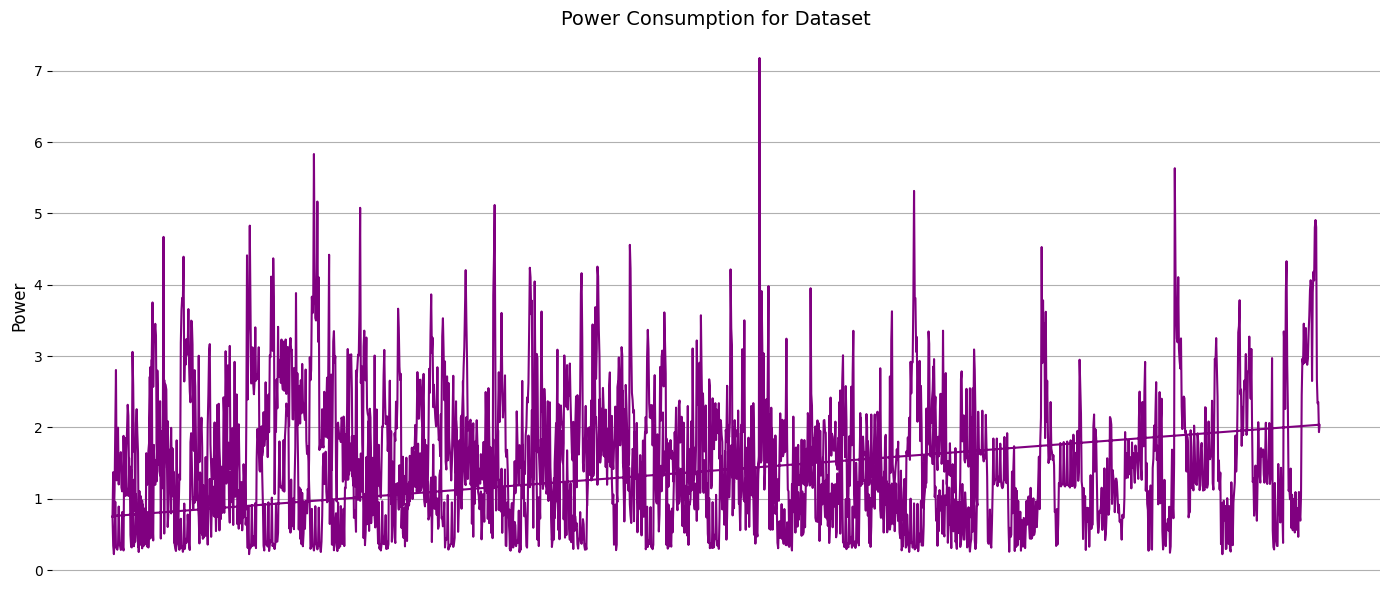

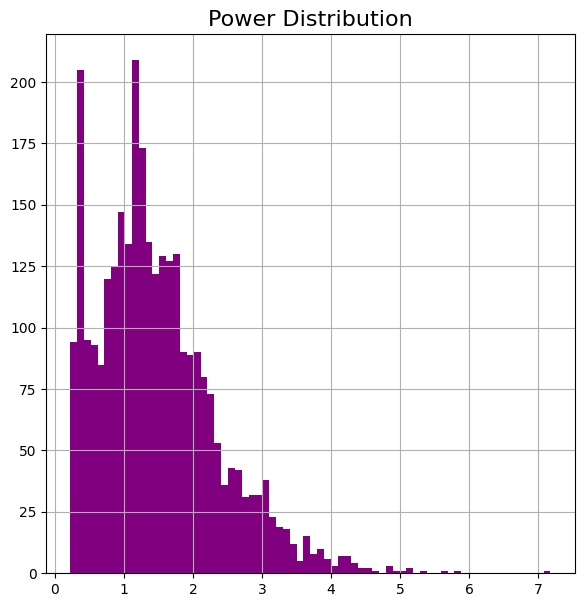

In [12]:
plt.figure(figsize=(14, 6))
plt.plot(df['Power'], color='purple')
plt.ylabel('Power', fontsize=12)
plt.xlabel('Date', fontsize=12)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.tick_params(bottom=False)
plt.title('Power Consumption for Dataset', fontsize=14)
plt.tight_layout()
plt.grid(True)
sns.despine(bottom=True, left=True)
# plt.show()

# Plotting the histogram and normal probability plot for 'Power' column
plt.figure(figsize=(15, 7))
# Histogram of 'Global_active_power' column
plt.subplot(1, 2, 1)
df['Power'].hist(bins=70, color='purple')
plt.title('Power Distribution', fontsize=16)

### Scaling the dataset

In [13]:
def scaling_data(data):
    scaler = RobustScaler()
    scaler = scaler.fit(np.asarray(data[['Power', 'Occupation']]))
    data[['Power', 'Occupation']] = scaler.transform(
        np.asarray(data[['Power', 'Occupation']]))
    return data[['Power', 'Occupation']]


data = load_dataset(loadmat("LCAlgarve.mat"))
scaling_data(data)

,Power,Occupation
0,-0.536837,2.0
1,0.034973,2.0
2,-0.525372,2.0
3,-0.189488,2.0
4,0.531026,2.0
...,...,...
1249,0.733706,0.0
1250,-0.846021,0.0
1251,-0.952756,0.0
1252,-0.875008,0.0


### Function to create dataset after sampling for forecast
The objective is to forecast the house electricity consumption (and optionally, occupation) for the next 12 hours using historical data sampled every 15 minutes.

In [14]:
def create_dataset(data,lookback, horizon):
    X = []
    y_power = []
    y_occupation = []
    for i in range(len(data) - lookback - horizon + 1):
        X.append(data[['Occupation', 'Power']].values[i:(i + lookback), :])
        y_power.append(data['Power'].values[(
            i + lookback):(i + lookback + horizon)])
        y_occupation.append(data['Occupation'].values[(
            i + lookback):(i + lookback + horizon)])
    X = np.array(X)
    y_power = np.array(y_power)
    y_occupation = np.array(y_occupation)
    return X, y_power, y_occupation


lookback = 380  
# Explanation: 24 hours * 4 (15-minute intervals per hour)
# The dataset is sampled every 15 minutes, so there are 4 samples per hour.
# For a 24-hour period, we need 24 hours * 4 samples/hour = 96 samples.
# By setting lookback = 380, we are considering a period of 380 / 4 ≈ 95 hours, 
# which is approximately 4 days worth of historical data.
horizon = 48    
# 12 hours ahead * 4 (15-minute intervals per hour)
# Explanation: The dataset is sampled every 15 minutes, so there are 4 samples per hour.
# To predict for the next 12 hours, we need 12 hours * 4 samples/hour = 48 samples.
# By setting horizon = 48, we are defining that the model should predict the next 48 samples, 
# which corresponds to 12 hours ahead.


X, y_power, y_occupation = create_dataset(data, lookback, horizon)
# Split the data into training and testing sets
train_size = int(len(X) * 0.9)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train_power, y_test_power = y_power[:train_size], y_power[train_size:]
y_train_occupation, y_test_occupation = y_occupation[:
                                                     train_size], y_occupation[train_size:]

# Reshape X for MLPRegressor and SVR
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

In [15]:
# Function for training and predicting for each step in the horizon
def model_prediction(model):
    predictions_power = []
    predictions_occupation = []
    for step in range(horizon):
        model_power = model.__class__(**model.get_params())
        model_occupation = model.__class__(**model.get_params())
        model_power.fit(X_train_flat, y_train_power[:, step])
        model_occupation.fit(X_train_flat, y_train_occupation[:, step])
        predictions_power.append(model_power.predict(X_test_flat))
        predictions_occupation.append(model_occupation.predict(X_test_flat))
    y_pred_power = np.array(predictions_power).T
    y_pred_occupation = np.array(predictions_occupation).T
    return y_pred_power, y_pred_occupation


# Train and predict using MLPRegressor
mlp_model = MLPRegressor(hidden_layer_sizes=(
    100, 50), max_iter=500, random_state=42)
y_pred_mlp_power, y_pred_mlp_occupation = model_prediction(mlp_model)

# Train and predict using SVR
svr_model = SVR(kernel='rbf')
y_pred_svr_power, y_pred_svr_occupation = model_prediction(svr_model)

In [16]:
# Evaluate the models for power prediction
mse_mlp_power = mean_squared_error(y_test_power, y_pred_mlp_power)
mse_svr_power = mean_squared_error(y_test_power, y_pred_svr_power)

mae_mlp_power = mean_absolute_error(y_test_power, y_pred_mlp_power)
mae_svr_power = mean_absolute_error(y_test_power, y_pred_svr_power)

r2_mlp_power = r2_score(y_test_power, y_pred_mlp_power)
r2_svr_power = r2_score(y_test_power, y_pred_svr_power)

explained_variance_mlp_power = explained_variance_score(
    y_test_power, y_pred_mlp_power)
explained_variance_svr_power = explained_variance_score(
    y_test_power, y_pred_svr_power) 

# Evaluate the models for occupation prediction
mse_mlp_occupation = mean_squared_error(
    y_test_occupation, y_pred_mlp_occupation)
mse_svr_occupation = mean_squared_error(
    y_test_occupation, y_pred_svr_occupation)

mae_mlp_occupation = mean_absolute_error(
    y_test_occupation, y_pred_mlp_occupation)
mae_svr_occupation = mean_absolute_error(
    y_test_occupation, y_pred_svr_occupation)

r2_mlp_occupation = r2_score(y_test_occupation, y_pred_mlp_occupation)
r2_svr_occupation = r2_score(y_test_occupation, y_pred_svr_occupation)

explained_variance_mlp_occupation = explained_variance_score(
    y_test_occupation, y_pred_mlp_occupation)
explained_variance_svr_occupation = explained_variance_score(
    y_test_occupation, y_pred_svr_occupation)

print(f'MLP Power Mean Squared Error: {mse_mlp_power}')
print(f'SVR Power Mean Squared Error: {mse_svr_power}')
print(f'MLP Power Mean Absolute Error: {mae_mlp_power}')
print(f'SVR Power Mean Absolute Error: {mae_svr_power}')
print(f'MLP Power R-squared: {r2_mlp_power}')
print(f'SVR Power R-squared: {r2_svr_power}')
print(f'MLP Power Explained Variance: {explained_variance_mlp_power}')
print(f'SVR Power Explained Variance: {explained_variance_svr_power}')

print(f'MLP Occupation Mean Squared Error: {mse_mlp_occupation}')
print(f'SVR Occupation Mean Squared Error: {mse_svr_occupation}')
print(f'MLP Occupation Mean Absolute Error: {mae_mlp_occupation}')
print(f'SVR Occupation Mean Absolute Error: {mae_svr_occupation}')
print(f'MLP Occupation R-squared: {r2_mlp_occupation}')
print(f'SVR Occupation R-squared: {r2_svr_occupation}')
print(
    f'MLP Occupation Explained Variance: {explained_variance_mlp_occupation}')
print(
    f'SVR Occupation Explained Variance: {explained_variance_svr_occupation}')

MLP Power Mean Squared Error: 1.0209960731567145
SVR Power Mean Squared Error: 0.7315169853189868
MLP Power Mean Absolute Error: 0.836601986299772
SVR Power Mean Absolute Error: 0.7162477605991117
MLP Power R-squared: -2.0036934739443932
SVR Power R-squared: -1.1495955858238986
MLP Power Explained Variance: -0.5614704632619211
SVR Power Explained Variance: -0.12967849700614253
MLP Occupation Mean Squared Error: 0.09103045028808805
SVR Occupation Mean Squared Error: 0.03166349536870206
MLP Occupation Mean Absolute Error: 0.22735001699921953
SVR Occupation Mean Absolute Error: 0.13724455706474337
MLP Occupation R-squared: 0.0
SVR Occupation R-squared: 0.0
MLP Occupation Explained Variance: 0.0
SVR Occupation Explained Variance: 0.0


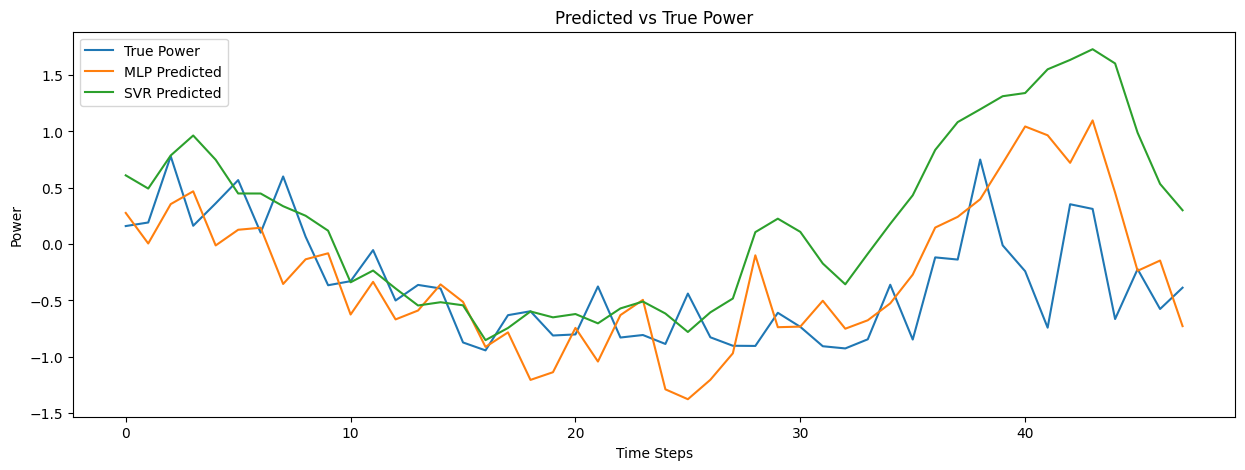

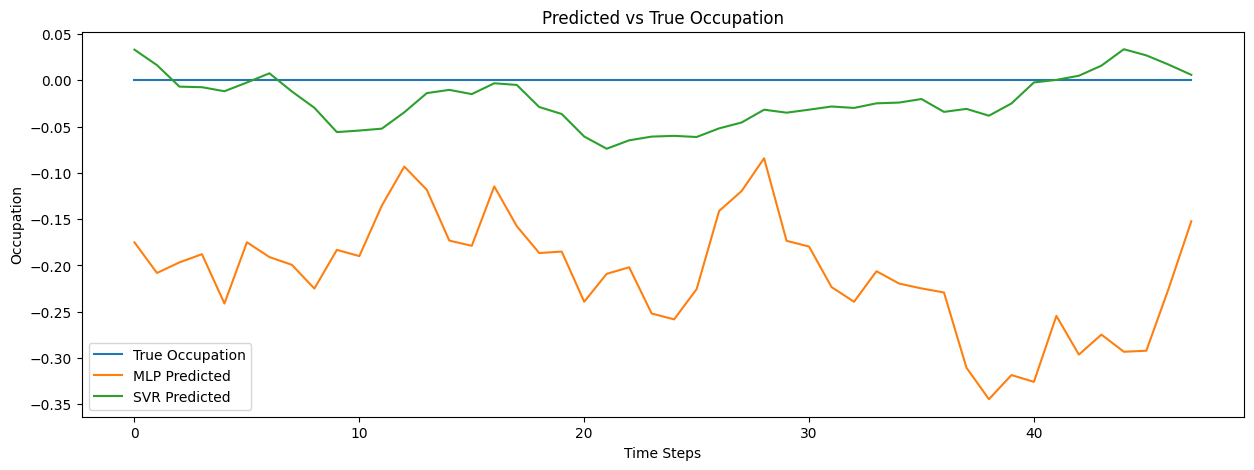

In [17]:
# plot the results
def plot_result(label,y1,y2,y3,l1,l2):
    plt.figure(figsize=(15, 5))
    plt.plot(y1, label=label)
    plt.plot(y2, label='MLP Predicted')
    plt.plot(y3, label='SVR Predicted')
    plt.legend()
    plt.xlabel('Time Steps')
    plt.ylabel(l1)
    plt.title(l2)
    plt.show()


plot_result(label='True Power', y1=y_test_power[0], y2=y_pred_mlp_power[0], y3=y_pred_svr_power[0], l1='Power',l2='Predicted vs True Power')
plot_result(label='True Occupation', y1=y_test_occupation[0], y2=y_pred_mlp_occupation[0],
            y3=y_pred_svr_occupation[0], l1='Occupation', l2='Predicted vs True Occupation')

## Hyperparameter tuning

In [18]:
from sklearn.model_selection import GridSearchCV
# Define parameter grids
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (50, 100)],
    'max_iter': [200, 500],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

svr_param_grid = {
    'kernel': ['rbf', 'linear'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}
# Grid search for MLPRegressor
mlp = MLPRegressor(random_state=42)
mlp_grid_search = GridSearchCV(
    mlp, mlp_param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
# Use the first step for grid search
mlp_grid_search.fit(X_train_flat, y_train_power[:, 0])
best_mlp_params = mlp_grid_search.best_params_

# Grid search for SVR
svr = SVR()
svr_grid_search = GridSearchCV(
    svr, svr_param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
# Use the first step for grid search
svr_grid_search.fit(X_train_flat, y_train_power[:, 0])
best_svr_params = svr_grid_search.best_params_

# Train and predict using best MLPRegressor
mlp_best = MLPRegressor(**best_mlp_params, random_state=42)
y_pred_mlp_power, y_pred_mlp_occupation = model_prediction(mlp_best)

# Train and predict using best SVR
svr_best = SVR(**best_svr_params)
y_pred_svr_power, y_pred_svr_occupation = model_prediction(svr_best)

In [19]:
# Evaluate the models for power prediction
mse_mlp_power = mean_squared_error(y_test_power, y_pred_mlp_power)
mse_svr_power = mean_squared_error(y_test_power, y_pred_svr_power)

mae_mlp_power = mean_absolute_error(y_test_power, y_pred_mlp_power)
mae_svr_power = mean_absolute_error(y_test_power, y_pred_svr_power)

r2_mlp_power = r2_score(y_test_power, y_pred_mlp_power)
r2_svr_power = r2_score(y_test_power, y_pred_svr_power)

explained_variance_mlp_power = explained_variance_score(
    y_test_power, y_pred_mlp_power)
explained_variance_svr_power = explained_variance_score(
    y_test_power, y_pred_svr_power)

# Evaluate the models for occupation prediction
mse_mlp_occupation = mean_squared_error(
    y_test_occupation, y_pred_mlp_occupation)
mse_svr_occupation = mean_squared_error(
    y_test_occupation, y_pred_svr_occupation)

mae_mlp_occupation = mean_absolute_error(
    y_test_occupation, y_pred_mlp_occupation)
mae_svr_occupation = mean_absolute_error(
    y_test_occupation, y_pred_svr_occupation)

r2_mlp_occupation = r2_score(y_test_occupation, y_pred_mlp_occupation)
r2_svr_occupation = r2_score(y_test_occupation, y_pred_svr_occupation)

explained_variance_mlp_occupation = explained_variance_score(
    y_test_occupation, y_pred_mlp_occupation)
explained_variance_svr_occupation = explained_variance_score(
    y_test_occupation, y_pred_svr_occupation)

print(f'MLP Power Mean Squared Error: {mse_mlp_power}')
print(f'SVR Power Mean Squared Error: {mse_svr_power}')
print(f'MLP Power Mean Absolute Error: {mae_mlp_power}')
print(f'SVR Power Mean Absolute Error: {mae_svr_power}')
print(f'MLP Power R-squared: {r2_mlp_power}')
print(f'SVR Power R-squared: {r2_svr_power}')
print(f'MLP Power Explained Variance: {explained_variance_mlp_power}')
print(f'SVR Power Explained Variance: {explained_variance_svr_power}')

print(f'MLP Occupation Mean Squared Error: {mse_mlp_occupation}')
print(f'SVR Occupation Mean Squared Error: {mse_svr_occupation}')
print(f'MLP Occupation Mean Absolute Error: {mae_mlp_occupation}')
print(f'SVR Occupation Mean Absolute Error: {mae_svr_occupation}')
print(f'MLP Occupation R-squared: {r2_mlp_occupation}')
print(f'SVR Occupation R-squared: {r2_svr_occupation}')
print(
    f'MLP Occupation Explained Variance: {explained_variance_mlp_occupation}')
print(
    f'SVR Occupation Explained Variance: {explained_variance_svr_occupation}')

MLP Power Mean Squared Error: 1.069034100879959
SVR Power Mean Squared Error: 0.7315169853189868
MLP Power Mean Absolute Error: 0.8567450869983867
SVR Power Mean Absolute Error: 0.7162477605991117
MLP Power R-squared: -2.144013278950895
SVR Power R-squared: -1.1495955858238986
MLP Power Explained Variance: -0.6117327448109137
SVR Power Explained Variance: -0.12967849700614253
MLP Occupation Mean Squared Error: 0.04695480839816107
SVR Occupation Mean Squared Error: 0.03166349536870206
MLP Occupation Mean Absolute Error: 0.1665791482852813
SVR Occupation Mean Absolute Error: 0.13724455706474337
MLP Occupation R-squared: 0.0
SVR Occupation R-squared: 0.0
MLP Occupation Explained Variance: 0.0
SVR Occupation Explained Variance: 0.0


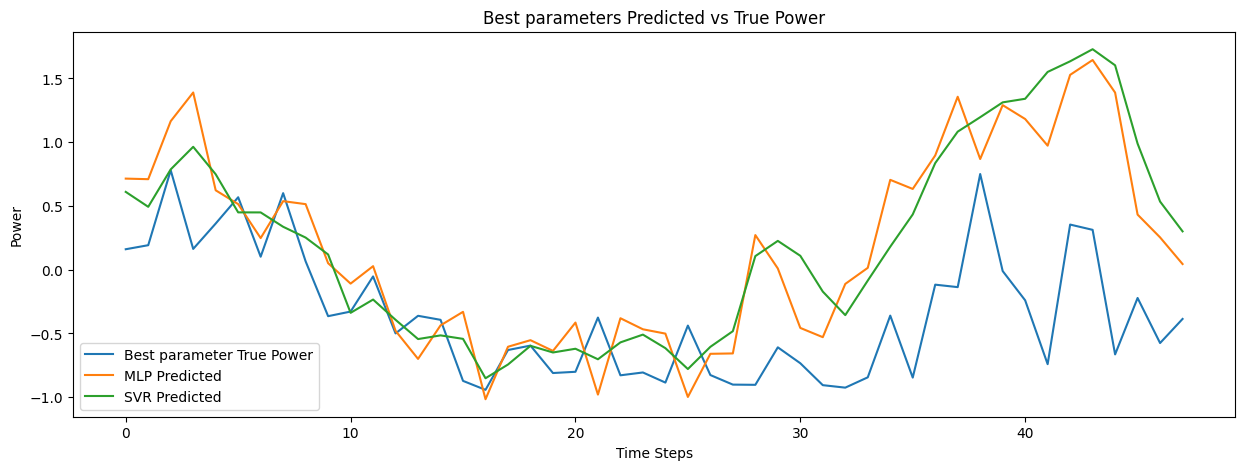

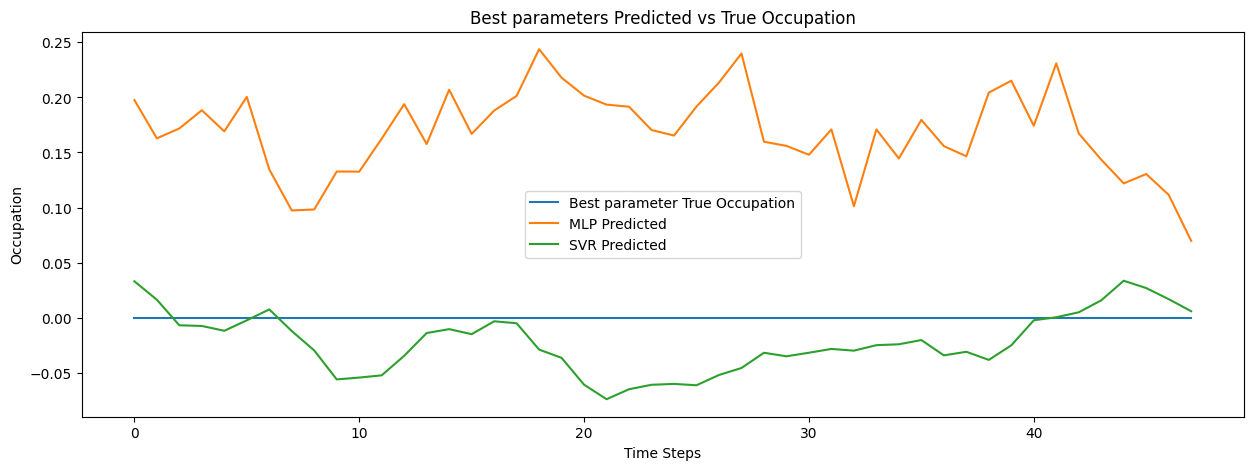

In [20]:
plot_result(label='Best parameter True Power', y1=y_test_power[0], y2=y_pred_mlp_power[0],
            y3=y_pred_svr_power[0], l1='Power', l2='Best parameters Predicted vs True Power')
plot_result(label='Best parameter True Occupation', y1=y_test_occupation[0], y2=y_pred_mlp_occupation[0],
            y3=y_pred_svr_occupation[0], l1='Occupation', l2='Best parameters Predicted vs True Occupation')